In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:

# Read the CSV files
Country_Final = pd.read_csv('Country_Final.csv',sep = ',')

# Read the CSV files
mpi_df = pd.read_csv('mpi_model.csv',sep = ',')

merged_df = pd.merge(Country_Final, mpi_df, on=['Country'])

In [3]:
mpi_df

,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
0,Kazakhstan,-0.879720,-0.930312,-1.639400,-1.072205,-1.206570,-1.547421
1,Serbia,-0.879720,-0.924724,-0.054480,-1.062216,-1.194186,-0.746509
2,Kyrgyzstan,-0.879720,-0.924724,-0.289283,-1.057222,-1.188145,-1.112640
3,Tunisia,-0.879720,-0.924724,-1.189361,-1.012271,-1.113237,-0.929575
4,Armenia,-0.868198,-0.919135,-1.639400,-1.067211,-1.197508,-1.135524
...,...,...,...,...,...,...,...
97,Central African Republic,2.450067,2.321948,1.569573,1.519949,1.502809,1.255773
98,Liberia,2.461589,2.450473,1.236935,1.330158,1.353899,1.118473
99,Somalia,2.496154,2.193422,2.097879,2.179225,1.718170,2.331284
100,Chad,2.617133,2.690760,2.430517,1.969456,1.612151,2.102452


In [4]:
merged_df

,Country,Region,Population (millions),HDI,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Total Ecological Footprint,...,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
0,Afghanistan,Middle East/Central Asia,29.82,0.46,0.30,0.20,0.08,0.18,0.00,0.79,...,-0.30,0.46,1.60,6,0.641152,0.679054,0.806463,0.660892,0.743760,0.775225
1,Albania,Northern/Eastern Europe,3.16,0.73,0.78,0.22,0.25,0.87,0.02,2.21,...,-1.03,1.27,1.87,6,-0.845155,-0.885607,-0.778456,-1.037244,-1.152805,-1.043991
2,Algeria,Africa,38.48,0.73,0.60,0.16,0.17,1.14,0.01,2.12,...,-1.53,1.22,3.61,5,-0.845155,-0.891195,-0.934991,-1.017266,-1.127735,-0.780834
3,Armenia,Middle East/Central Asia,2.97,0.73,0.74,0.18,0.34,0.89,0.01,2.23,...,-1.35,1.29,2.52,3B,-0.868198,-0.919135,-1.639400,-1.067211,-1.197508,-1.135524
4,Azerbaijan,Middle East/Central Asia,9.31,0.75,0.66,0.22,0.11,1.25,0.01,2.31,...,-1.46,1.33,2.72,6,-0.776024,-0.790610,-0.895857,-0.897397,-0.943485,-0.757950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Uzbekistan,Middle East/Central Asia,28.54,0.67,0.62,0.13,0.08,1.41,0.00,2.32,...,-1.40,1.34,2.52,6,-0.833633,-0.868843,-1.521998,-1.022260,-1.122902,-1.169848
86,Viet Nam,Asia-Pacific,7.97,0.66,0.50,0.01,0.19,0.79,0.05,1.65,...,-0.65,0.95,1.66,6,-0.729937,-0.729141,-0.934991,-0.892403,-0.943787,-0.620651
87,Yemen,Middle East/Central Asia,23.85,0.50,0.34,0.14,0.04,0.42,0.04,1.03,...,-0.53,0.59,2.06,5,0.042021,0.131422,0.082488,0.446128,0.534138,0.672251
88,Zambia,Africa,14.08,0.58,0.19,0.18,0.33,0.24,0.01,0.99,...,1.24,0.57,0.44,6,0.618108,0.718170,0.454259,0.825711,1.031915,0.512068


In [5]:
merged_df = merged_df.drop(['Region','Data Quality','Population (millions)','HDI','Countries Required','Earths Required','Biocapacity Deficit or Reserve','Total Biocapacity','Total Ecological Footprint','Headcount Ratio Rural','Intensity of Deprivation Rural','Intensity of Deprivation Urban','Headcount Ratio Urban'], axis=1)

In [6]:
merged_df

,Country,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,MPI Urban,MPI Rural
0,Afghanistan,0.30,0.20,0.08,0.18,0.00,0.24,0.200,0.02,0.00,0.04,0.641152,0.660892
1,Albania,0.78,0.22,0.25,0.87,0.02,0.55,0.210,0.29,0.07,0.06,-0.845155,-1.037244
2,Algeria,0.60,0.16,0.17,1.14,0.01,0.24,0.270,0.03,0.01,0.03,-0.845155,-1.017266
3,Armenia,0.74,0.18,0.34,0.89,0.01,0.44,0.260,0.10,0.02,0.07,-0.868198,-1.067211
4,Azerbaijan,0.66,0.22,0.11,1.25,0.01,0.46,0.200,0.11,0.02,0.06,-0.776024,-0.897397
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,Uzbekistan,0.62,0.13,0.08,1.41,0.00,0.56,0.200,0.06,0.03,0.08,-0.833633,-1.022260
86,Viet Nam,0.50,0.01,0.19,0.79,0.05,0.55,0.010,0.17,0.16,0.10,-0.729937,-0.892403
87,Yemen,0.34,0.14,0.04,0.42,0.04,0.09,0.120,0.04,0.20,0.04,0.042021,0.446128
88,Zambia,0.19,0.18,0.33,0.24,0.01,0.24,0.715,0.99,0.02,0.04,0.618108,0.825711


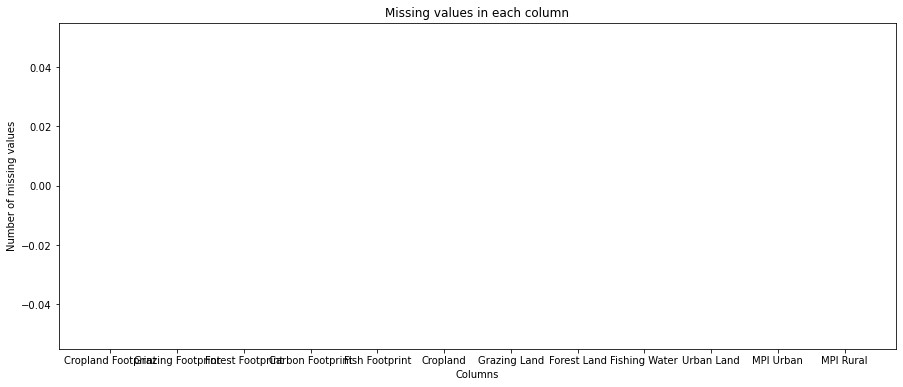

In [7]:
num_missing = merged_df[['Cropland Footprint','Grazing Footprint', 'Forest Footprint', 'Carbon Footprint', 'Fish Footprint','Cropland','Grazing Land','Forest Land','Fishing Water','Urban Land','MPI Urban','MPI Rural']].isnull().sum()

# Create a bar chart
plt.bar(num_missing.index, num_missing.values, width=0.4, align='center')

# Add labels and title
plt.xlabel('Columns')
plt.ylabel('Number of missing values')
plt.title('Missing values in each column')
fig = plt.gcf()
fig.set_size_inches(15, 6)
# Show the plot
plt.show()

In [8]:
stats = merged_df.describe()

# Print the statistics
print(stats)

       Cropland Footprint  Grazing Footprint  Forest Footprint  \
count           90.000000          90.000000         90.000000   
mean             0.449222           0.196056          0.286000   
std              0.150924           0.170657          0.187328   
min              0.160000           0.000000          0.010000   
25%              0.340000           0.070000          0.170000   
50%              0.440000           0.155000          0.245000   
75%              0.550000           0.247500          0.375000   
max              0.800000           0.615000          0.870000   

       Carbon Footprint  Fish Footprint   Cropland  Grazing Land  Forest Land  \
count         90.000000       90.000000  90.000000     90.000000    90.000000   
mean           0.854653        0.065069   0.366361      0.271500     0.486819   
std            0.997899        0.075804   0.214652      0.261439     0.711007   
min            0.010000        0.000000   0.040000      0.000000     0.000000   


<AxesSubplot:>

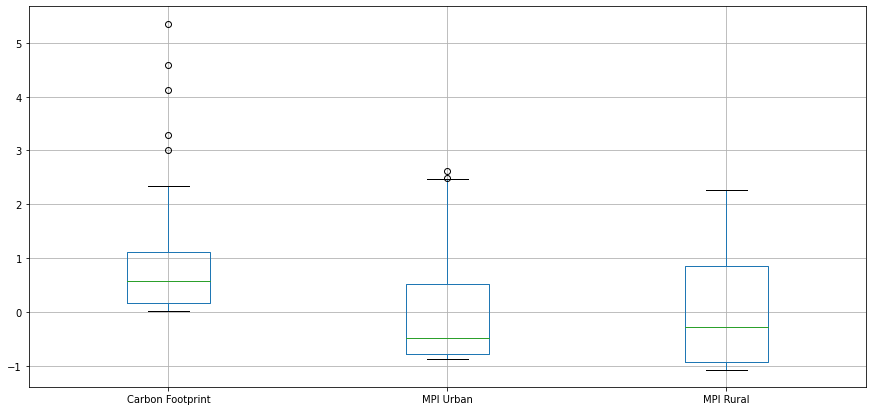

In [9]:
X = merged_df[['Carbon Footprint','MPI Urban','MPI Rural']]
#X = merged_df[['Cropland Footprint','Grazing Footprint', 'Forest Footprint', 'Carbon Footprint', 'Fish Footprint','Cropland','Grazing Land','Forest Land','Fishing Water','Urban Land','MPI Urban','MPI Rural']]
X.boxplot(figsize=(15,7))


In [10]:
X.corr()

,Carbon Footprint,MPI Urban,MPI Rural
Carbon Footprint,1.000000,-0.523640,-0.588927
MPI Urban,-0.523640,1.000000,0.945441
MPI Rural,-0.588927,0.945441,1.000000


In [11]:
##encodage
#from sklearn.preprocessing import LabelEncoder

#encoder = LabelEncoder()
#merged_df['Country'] = encoder.fit_transform(merged_df['Country'])

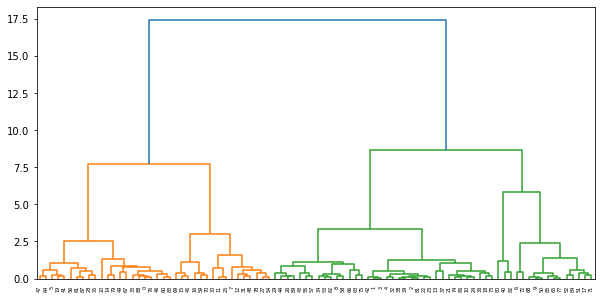

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


# Appliquer CAH à ces données
Z = linkage(X, 'ward')

# Tracer le dendrogramme
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

In [13]:
from scipy.spatial.distance import pdist

# Calculer la matrice de distance
dist_matrix = pdist(X, metric='euclidean')

In [14]:
dist_matrix

array([2.35984578, 2.43863082, 2.40178621, ..., 0.71299409, 0.74332406,
       1.44841136])

In [15]:
from scipy.cluster.hierarchy import fcluster

# Extraire les clusters à partir de la hauteur de coupure
cluster_labels = fcluster(Z, t=3, criterion='distance')

In [16]:
cluster_labels

array([1, 5, 5, 5, 5, 1, 7, 3, 4, 7, 5, 3, 3, 5, 1, 2, 2, 7, 5, 1, 1, 5,
       5, 5, 5, 3, 4, 3, 1, 4, 3, 3, 5, 1, 4, 1, 5, 5, 5, 5, 6, 1, 5, 4,
       4, 2, 1, 1, 3, 1, 7, 7, 7, 4, 3, 4, 1, 4, 4, 2, 1, 1, 4, 4, 1, 7,
       4, 1, 7, 2, 2, 7, 7, 5, 5, 4, 1, 7, 3, 1, 6, 5, 6, 1, 7, 7, 5, 1,
       1, 4], dtype=int32)

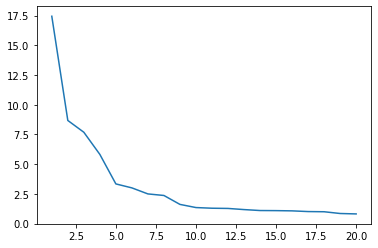

In [17]:
# Calculer les distances des observations aux centres des clusters
last = Z[-20:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

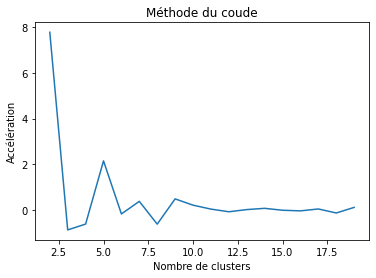

In [18]:
# Trouver le coude
acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("Accélération")
plt.show()

In [19]:
k=2

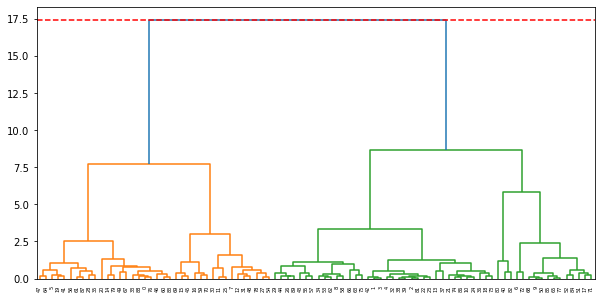

In [20]:
# Tracer le dendrogramme avec la coupure
fig, ax = plt.subplots(figsize=(10, 5))
dendrogram(Z, ax=ax)
ax.axhline(y=Z[-(k-1),2], color='r', linestyle='--')
plt.show()

In [21]:

# Trouver la meilleure coupe
k = acceleration_rev.argmax() + 2  # si le coude est le point 0, il faut ajouter 2 pour obtenir le nombre de clusters
print(f"La meilleure coupe est à k={k}")

La meilleure coupe est à k=2


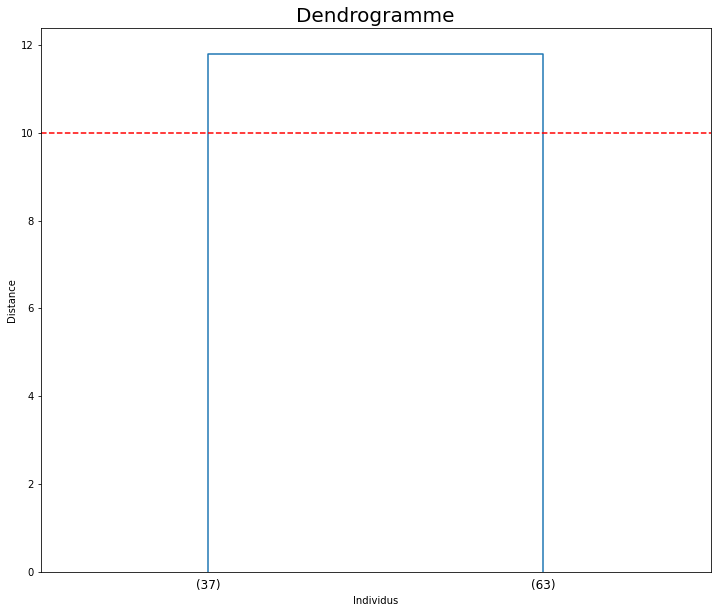

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculer la matrice de distance et réaliser la CAH
Z = linkage(X, method='ward')

# Afficher le dendrogramme avec les nombres de cluster
plt.figure(figsize=(12, 10))
plt.title('Dendrogramme', fontsize=20)
plt.xlabel('Individus')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=0, leaf_font_size=12, truncate_mode='lastp', p=2)
plt.axhline(y=10, color='r', linestyle='--')
plt.show()


In [26]:
# check the data type of the elements in the array
print(X.dtype)

float64


C:\Users\zeffz\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
